# Polscope with phase reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fft2, ifft2, fftn, ifftn, fftshift, ifftshift

import pickle
import waveorder as wo

import time

%matplotlib inline
plt.style.use(['dark_background']) # Plotting option for dark background


### Load data

In [2]:
# Load simulations

# f = open('simulation_data_3D_Pol_phase_inc_NA_illu_09_no_135_ne_140_17_illu_no_noise.pckl', 'rb')
# f = open('simulation_data_3D_Pol_phase_inc_NA_illu_09_no_135_ne_140_no_noise.pckl', 'rb')
# f = open('simulation_data_3D_Pol_phase_inc.pckl', 'rb')
# f = open('simulation_data_3D_Pol_phase_inc_NA_illu_09_no_135_ne_140_single_layer_no_noise.pckl', 'rb')
f = open('simulation_data_3D_Pol_phase_inc_NA_illu_09_no_135_ne_140_single_layer_thick_no_noise.pckl', 'rb')
I_meas, lambda_illu, n_media, ps, psz, NA_obj, NA_illu, Source_cont, z_defocus, chi = pickle.load(f)
f.close()


I_meas = np.transpose(I_meas[:,:,:,:,50],(0,2,3,1))
z_defocus = np.array([0])


In [3]:
I_meas.shape

(5, 200, 200, 9)

### Stokes vector/Polarization reconstruction

In [4]:
_, N, M, _ = I_meas.shape
cali        = False               
bg_option   = 'global'            
use_gpu = True
gpu_id = 3

setup = wo.waveorder_microscopy((N,M), lambda_illu, ps, NA_obj, NA_illu, z_defocus, chi, \
                                n_media=n_media, cali=cali, phase_deconv='2D', inc_recon='2D-vec-WOTF', \
                                illu_mode='Arbitrary', Source = Source_cont, use_gpu=use_gpu, gpu_id=gpu_id)
S_image_recon = setup.Stokes_recon(I_meas)
S_image_tm = setup.Stokes_transform(S_image_recon)
S_image_tm[1] = S_image_tm[1] - np.mean(S_image_tm[1], axis=(0,1))[np.newaxis,np.newaxis,:]
S_image_tm[2] = S_image_tm[2] - np.mean(S_image_tm[2], axis=(0,1))[np.newaxis,np.newaxis,:]
Recon_para =setup.Polarization_recon(S_image_tm)

In [5]:
wo.parallel_4D_viewer(np.transpose(S_image_recon,(3,0,1,2)), num_col=2, size=5)

interactive(children=(IntSlider(value=0, description='stack_idx', max=8), Output()), _dom_classes=('widget-int…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

In [6]:
wo.parallel_4D_viewer(np.transpose(S_image_tm,(3,0,1,2)), num_col=2, size=5)

interactive(children=(IntSlider(value=0, description='stack_idx', max=8), Output()), _dom_classes=('widget-int…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

In [7]:
wo.parallel_4D_viewer(np.transpose(Recon_para,(3,0,1,2)), num_col=2, size=5)

interactive(children=(IntSlider(value=0, description='stack_idx', max=8), Output()), _dom_classes=('widget-int…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

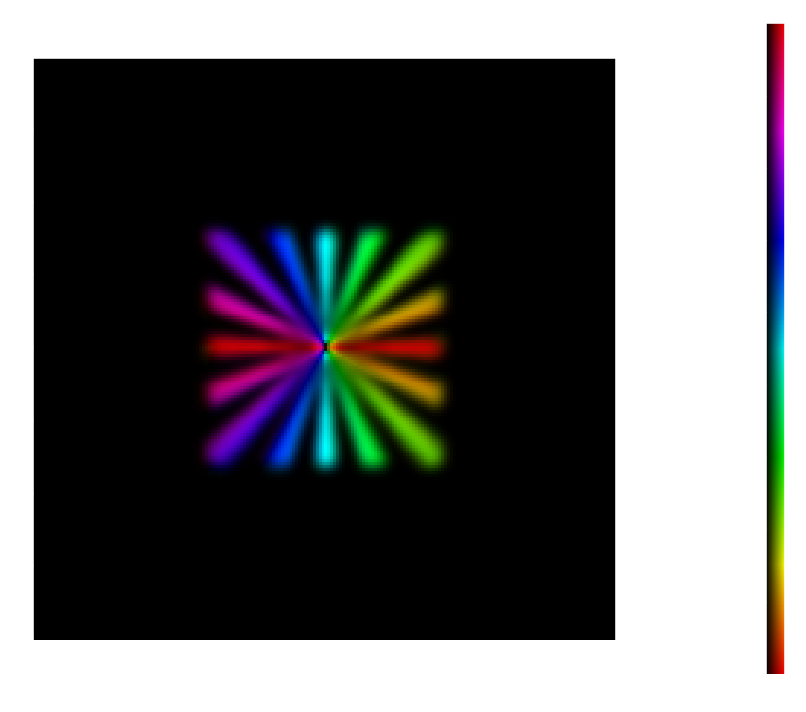

In [8]:
wo.plot_hsv([Recon_para[1,:,:,-1], Recon_para[0,:,:,-1]],max_val=1, origin='lower', size=10)

In [9]:
wo.hsv_stack_viewer([np.transpose(Recon_para[1],(2,0,1)), np.transpose(Recon_para[0],(2,0,1))], max_val=1, origin='lower', size=10)

interactive(children=(IntSlider(value=0, description='stack_idx', max=8), Output()), _dom_classes=('widget-int…

<function waveorder.visual.hsv_stack_viewer.<locals>.interact_plot_hsv(stack_idx)>

### Transfer function plot

In [13]:
plot_list = []

plot_list.append(np.real(fftshift(setup.Hu,axes=(0,1))))
plot_list.append(np.imag(fftshift(setup.Hu,axes=(0,1))))
plot_list.append(np.real(fftshift(setup.Hp,axes=(0,1))))
plot_list.append(np.imag(fftshift(setup.Hp,axes=(0,1))))

wo.parallel_4D_viewer(np.transpose(np.stack(plot_list), (3,0,1,2)), num_col=4, size=5, colormap='jet', origin='lower')

interactive(children=(IntSlider(value=0, description='stack_idx', max=8), Output()), _dom_classes=('widget-int…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

In [14]:
plot_list = []
for i in range(3):
    for j in range(7):
        OTF_fftshift = fftshift(setup.H_dyadic_2D_OTF[i,j],axes=(0,1))
        
        plot_list.append(np.real(OTF_fftshift))
        plot_list.append(np.imag(OTF_fftshift))
        
wo.parallel_4D_viewer(np.transpose(np.stack(plot_list), (3,0,1,2)), num_col=4, size=5, colormap='jet', origin='lower')


interactive(children=(IntSlider(value=0, description='stack_idx', max=8), Output()), _dom_classes=('widget-int…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

### 2D Phase reconstruction with $S_0$

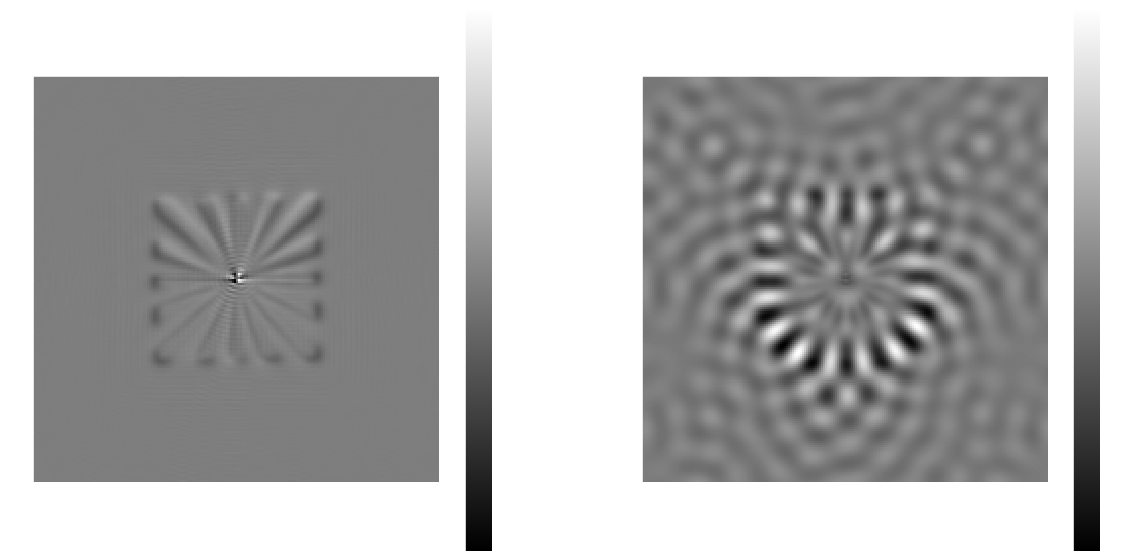

In [10]:

reg_u = 1e-3
reg_p = 1e-3
S0_stack = S_image_tm[0].copy()

mu_sample, phi_sample = setup.Phase_recon(S0_stack, method='Tikhonov', reg_u = reg_u, reg_p = reg_p)

wo.plot_multicolumn(np.array([mu_sample, phi_sample]), num_col=2, size=10, \
                    set_title=True, titles = ['Reconstructed absorption', 'Reconstructed phase'])

Number of iteration computed (1 / 50)
Number of iteration computed (2 / 50)
Number of iteration computed (3 / 50)
Number of iteration computed (4 / 50)
Number of iteration computed (5 / 50)
Number of iteration computed (6 / 50)
Number of iteration computed (7 / 50)
Number of iteration computed (8 / 50)
Number of iteration computed (9 / 50)
Number of iteration computed (10 / 50)
Number of iteration computed (11 / 50)
Number of iteration computed (12 / 50)
Number of iteration computed (13 / 50)
Number of iteration computed (14 / 50)
Number of iteration computed (15 / 50)
Number of iteration computed (16 / 50)
Number of iteration computed (17 / 50)
Number of iteration computed (18 / 50)
Number of iteration computed (19 / 50)
Number of iteration computed (20 / 50)
Number of iteration computed (21 / 50)
Number of iteration computed (22 / 50)
Number of iteration computed (23 / 50)
Number of iteration computed (24 / 50)
Number of iteration computed (25 / 50)
Number of iteration computed (26 /

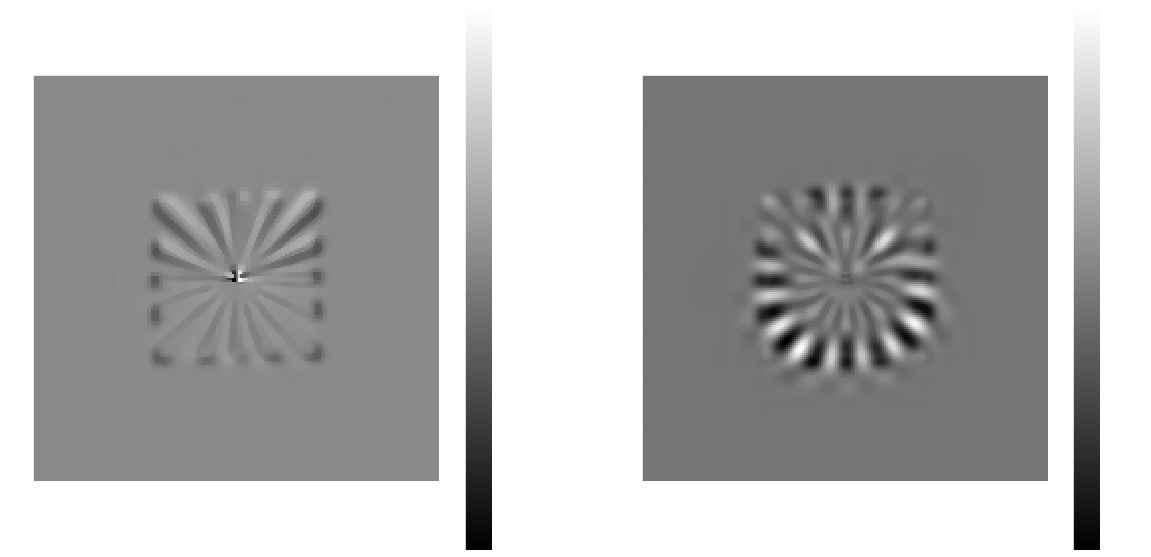

In [11]:

lambda_u = 1e-3
lambda_p = 1e-3
reg_u = 1e-5
reg_p = 1e-5

S0_stack = S_image_recon[0].copy()/np.mean(S_image_recon[0])

mu_sample, phi_sample = setup.Phase_recon(S0_stack, method='TV', reg_u = reg_u, reg_p = reg_p,\
                                            lambda_u = lambda_u, lambda_p = lambda_p, itr = 50, rho=1)

wo.plot_multicolumn(np.array([mu_sample, phi_sample]), num_col=2, size=10, \
                    set_title=True, titles = ['Reconstructed absorption', 'Reconstructed phase'])

### 2D joint phase / orientation reconstruction w dyadic Greens function

In [12]:
reg_inc = np.array([1, 1, 1, 1, 1, 1, 1])*1e-2
reg_ret_pr = 1e-2

S_image_tm_0 = (S_image_recon[0] - np.mean(S_image_recon[0], axis=(0,1))[np.newaxis,np.newaxis,:])/\
                np.mean(S_image_recon[0], axis=(0,1))[np.newaxis,np.newaxis,:]

S_image_tm_1 = (S_image_recon[1] - np.mean(S_image_recon[1], axis=(0,1))[np.newaxis,np.newaxis,:])/\
                np.mean(S_image_recon[0], axis=(0,1))[np.newaxis,np.newaxis,:]

S_image_tm_2 = (S_image_recon[2] - np.mean(S_image_recon[2], axis=(0,1))[np.newaxis,np.newaxis,:])/\
                np.mean(S_image_recon[0], axis=(0,1))[np.newaxis,np.newaxis,:]

del_f_sol, retardance_pr, azimuth, theta = setup.Inclination_recon_2D_vec(np.stack([S_image_tm_0, S_image_tm_1, S_image_tm_2]), \
                                                                          reg_inc=reg_inc, reg_ret_pr = reg_ret_pr)

Finished preprocess, elapsed time: 0.12
Finished reconstruction, elapsed time: 4.41


In [13]:
wo.parallel_4D_viewer(np.transpose(del_f_sol[...,np.newaxis],(3,0,1,2)), num_col=4, origin='lower')

interactive(children=(IntSlider(value=0, description='stack_idx', max=0), Output()), _dom_classes=('widget-int…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

In [14]:
wo.parallel_4D_viewer(np.transpose(np.stack([-del_f_sol[0]/(4*np.pi/lambda_illu*n_media), \
                                             retardance_pr/(2*np.pi/lambda_illu*n_media)/2/np.pi*lambda_illu*1e3, \
                                             azimuth, theta])[...,np.newaxis],(3,0,1,2)), num_col=4, origin='lower')

interactive(children=(IntSlider(value=0, description='stack_idx', max=0), Output()), _dom_classes=('widget-int…

<function waveorder.visual.parallel_4D_viewer.<locals>.interact_plot(stack_idx)>

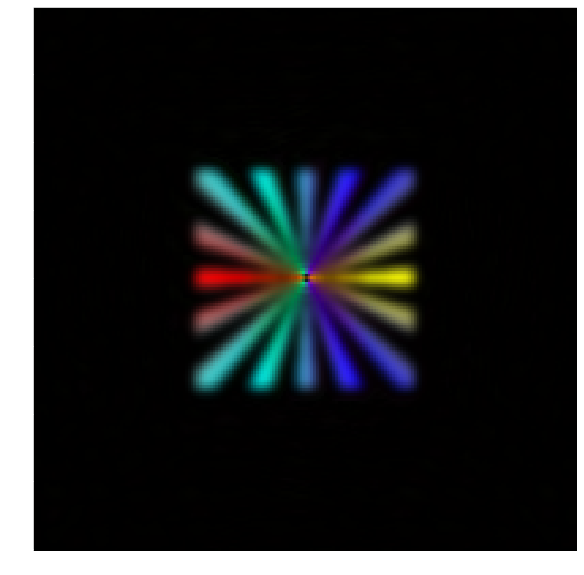

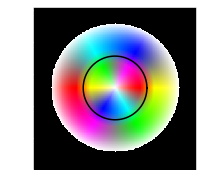

In [15]:

orientation_3D_image = np.transpose(np.array([azimuth/2/np.pi, theta, np.clip(retardance_pr/np.max(retardance_pr),0,1)]),(1,2,0))
orientation_3D_image_RGB = wo.orientation_3D_to_rgb(orientation_3D_image, interp_belt = 20/180*np.pi, sat_factor = 1)

plt.figure(figsize=(10,10))
plt.imshow(orientation_3D_image_RGB, origin='lower')
plt.figure(figsize=(3,3))
wo.orientation_3D_colorwheel(wheelsize=256, circ_size=50, interp_belt=20/180*np.pi, sat_factor=1)

Text(0.5, 1.0, 'recon')

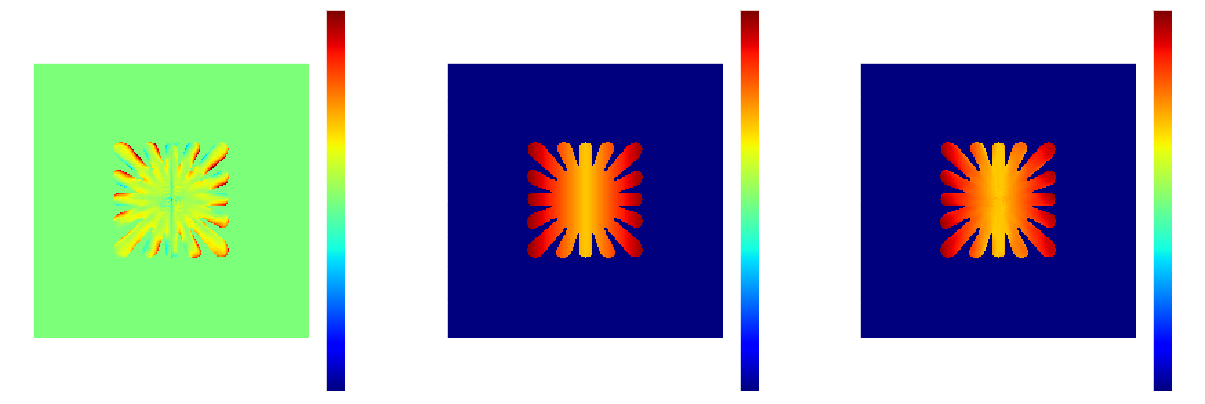

In [17]:
target, _, xx = wo.genStarTarget(N,M)
xx = xx/np.max(xx)
inc_angle = (np.abs(np.pi/2 * xx) + np.pi/2)
# azimuth = np.abs(azimuth)

# target = np.pad(target[:,:,np.newaxis], ((0,0), (0,0), (50,49)), mode='constant')
# azimuth = np.pad(azimuth[:,:,np.newaxis], ((0,0), (0,0), (50,49)), mode='constant')
# inc_angle = np.pad(inc_angle[:,:,np.newaxis], ((0,0), (0,0), (50,49)), mode='constant')

mask = target.copy()
mask[mask<0.2] = 0
mask[mask>=0.2] = 1

# mask = np.ones_like(target)

fig, ax = plt.subplots(1,3,figsize=(21,7))
ax1 = ax[0].imshow((mask*(inc_angle-(np.abs(theta-np.pi/2)+np.pi/2)))/np.pi*180, cmap='jet', origin='lower', vmin=-10, vmax=10)
plt.colorbar(ax1,ax=ax[0])
ax2 = ax[1].imshow((mask*inc_angle)/np.pi*180, cmap='jet', origin='lower', vmin=0, vmax=130)
plt.colorbar(ax2,ax=ax[1])
ax3 = ax[2].imshow((mask*(np.abs(theta-np.pi/2)+np.pi/2))/np.pi*180, cmap='jet', origin='lower',vmin=0, vmax=130)
plt.colorbar(ax3,ax=ax[2])


ax[0].set_title('ground truth - recon')
ax[1].set_title('ground truth')
ax[2].set_title('recon')



In [18]:
import cupy as cp
import gc
gc.collect()
cp.get_default_memory_pool().free_all_blocks()